In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

from sklearn.datasets import make_s_curve
data, color = make_s_curve(n_samples=1000)

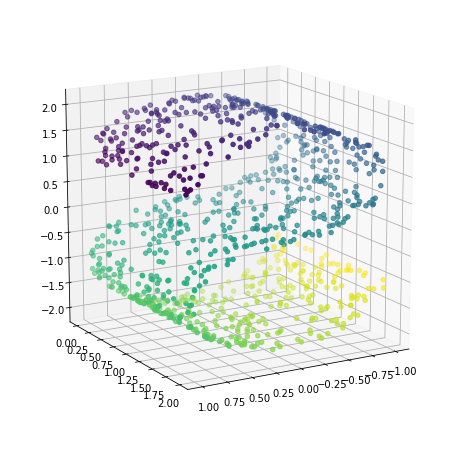

In [2]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=data[:,0],ys=data[:,1],zs=data[:,2],c=color)
ax.view_init(15,60)

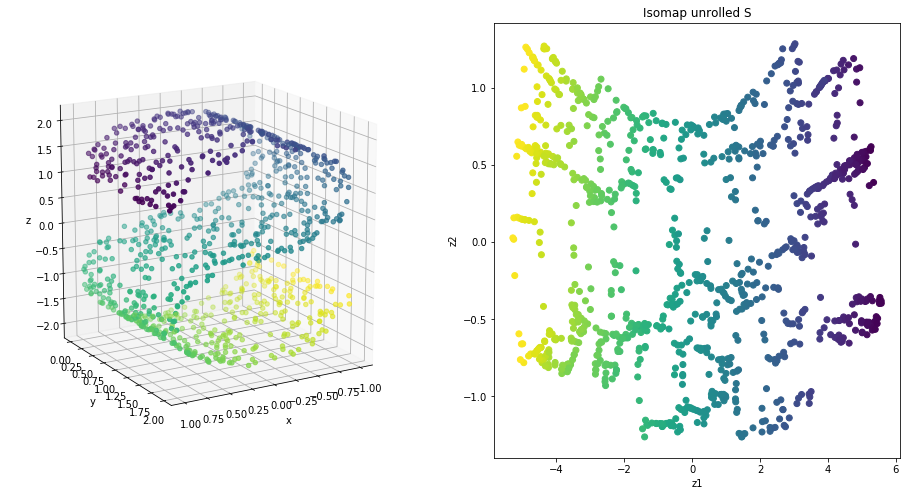

In [3]:
from sklearn.manifold import Isomap
n_neighbors = 5
n_components = 2
isomap = Isomap(n_neighbors=n_neighbors,
                                  n_components=n_components,
                                  eigen_solver='auto',
                                  tol=0, # only for arpack solver
                                  max_iter=None, # only for arpack solver
                                  path_method='auto', # algorithm for finding shortest path
                                  neighbors_algorithm='auto',
                                  metric='minkowski', # can be callable, option from 
                                                      # sklearn.metrics.pairwise_distances
                                                      # or precomputed, in which case X is assumed to be squared
                                                      # distance matrix
                                  p=2, # power for minkowski metric
                                  metric_params=None # additional parameters for the metric function if applicable
                                                     # pass as dictionary
                                 )
data_transf = isomap.fit_transform(data)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(xs=data[:,0],ys=data[:,1],zs=data[:,2],c=color)
ax.view_init(15,60)
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
ax = fig.add_subplot(122)
ax.scatter(x=data_transf[:,0],y=data_transf[:,1],c=color)
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Isomap unrolled S')
plt.show()

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedShuffleSplit

data = fetch_openml('mnist_784', version=1)#Get data from https://www.openml.org/d/554
dfData = pd.DataFrame(np.c_[data["data"],data["target"]],columns = data["feature_names"]+["target"])
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[data["feature_names"]], dfData["target"]):
    X_train = dfData[data["feature_names"]].iloc[train_index]
    X_test = dfData[data["feature_names"]].iloc[test_index]
    
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

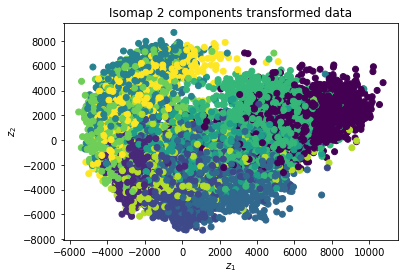

In [5]:
n_neighbors = 5
n_components = 2
isomap = Isomap(n_neighbors=n_neighbors,
                  n_components=n_components,
                  eigen_solver='auto',
                  tol=0,
                  max_iter=None,
                  path_method='auto',
                  neighbors_algorithm='auto',
                  metric='minkowski',
                  p=2,
                  metric_params=None
                 )

X_train_transf = isomap.fit_transform(X_train.iloc[:15000])
plt.scatter(X_train_transf[:, 0], X_train_transf[:, 1], c=y_train.astype(int).iloc[:15000])
plt.title('Isomap 2 components transformed data')
plt.xlabel(r'$z_1$')
plt.ylabel(r'$z_2$')
plt.show()

In [6]:
from sklearn.ensemble import RandomForestClassifier
import time
X_test_transf = isomap.transform(X_test)
rfc_clf = RandomForestClassifier()

start = time.time()
print('Random Forest Classifier original dataset score:',round(rfc_clf.fit(X_train.iloc[:15000],
                                                                           y_train.iloc[:15000]). \
                                                           score(X_test, y_test),3))
print('Fit and score time:',str(round(time.time()-start,2))+'s\n')
start = time.time()
print('Random Forest Classifier 2 components score:',round(rfc_clf.fit(X_train_transf,y_train.iloc[:15000]). \
                                                           score(X_test_transf, y_test),3))
print('Fit and score time using 2 component isomap result:',str(round(time.time()-start,2))+'s\n')

Random Forest Classifier original dataset score: 0.957
Fit and score time: 16.61s

Random Forest Classifier 2 components score: 0.439
Fit and score time using 2 component isomap result: 3.1s



In [7]:
n_components = 100
isomap_100 = Isomap(n_components=n_components)
X_train_transf = isomap_100.fit_transform(X_train.iloc[:15000])
X_test_transf = isomap_100.transform(X_test)
start = time.time()

print('Random Forest Classifier 100 components score:',round(rfc_clf.fit(X_train_transf,y_train.iloc[:15000]). \
                                                           score(X_test_transf, y_test),3))
print('Fit and score time using 100 component isomap result:',str(round(time.time()-start,2))+'s\n')

Random Forest Classifier 100 components score: 0.946
Fit and score time using 100 component isomap result: 15.94s

